In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

Using TensorFlow backend.


## Loading the Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding Image Data Format

In [4]:
X_train[0].shape

(28, 28)

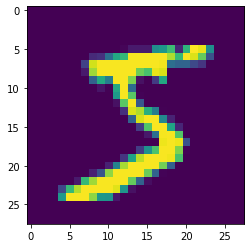

In [5]:
plt.imshow(X_train[0])

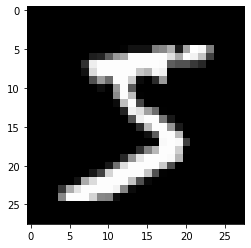

In [6]:
plt.imshow(X_train[0], cmap='gray')

In [7]:
y_train[0]

5

## Preprocessing Image Data

In [8]:
im_height, im_width = 28,28

In [10]:
X_train = X_train.reshape(60000, im_height*im_width)
X_test = X_test.reshape(10000, im_height*im_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [11]:
print(X_train[0])


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
X_train /= 255.0
X_test /= 255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [14]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [15]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Building the Model

In [16]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

## Compiling the Model

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Calculating the Parameters:
#### (784*512) + 512
#### (512*512) + 512
#### (512*10) + 10

## Training the Model

In [19]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test) )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 32s 529us/step - loss: 0.1972 - accuracy: 0.9404 - val_loss: 0.0977 - val_accuracy: 0.9731
Epoch 2/20
60000/60000 [==============================] - 32s 540us/step - loss: 0.0847 - accuracy: 0.9743 - val_loss: 0.0737 - val_accuracy: 0.9778
Epoch 3/20
60000/60000 [==============================] - 33s 550us/step - loss: 0.0577 - accuracy: 0.9825 - val_loss: 0.0915 - val_accuracy: 0.9761
Epoch 4/20
60000/60000 [==============================] - 30s 506us/step - loss: 0.0457 - accuracy: 0.9849 - val_loss: 0.0793 - val_accuracy: 0.9767
Epoch 5/20
60000/60000 [==============================] - 30s 508us/step - loss: 0.0361 - accuracy: 0.9881 - val_loss: 0.0883 - val_accuracy: 0.9779
Epoch 6/20
60000/60000 [==============================] - 32s 533us/step - loss: 0.0312 - accuracy: 0.9903 - v

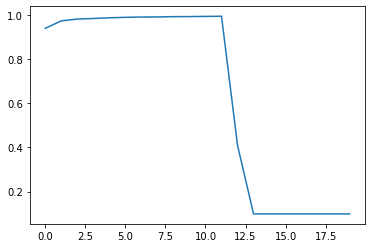

In [21]:
plt.plot(history.history['accuracy'])

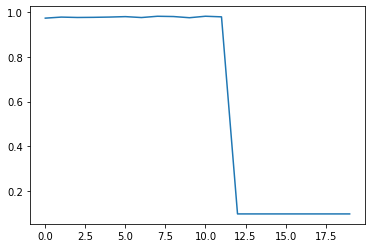

In [23]:
plt.plot(history.history['val_accuracy'])

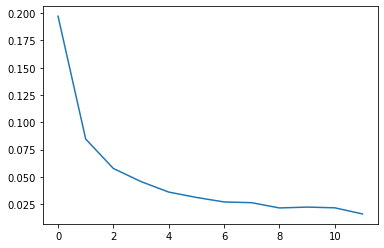

In [24]:
plt.plot(history.history['loss'])

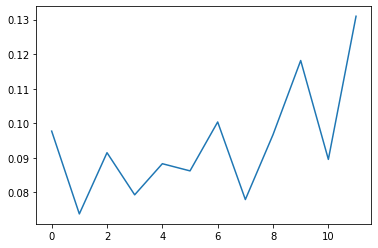

In [25]:
plt.plot(history.history['val_loss'])

In [26]:
score = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 68us/step
